# HITO 1 - INDIVIDUAL - SISTEMA DE GESTIÓN EMPRESARIAL

    24/11/2022 - Johan Estiben Acaro Masache


<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/2560px-Python_logo_and_wordmark.svg.png>

### Índice

    - Descargar la información del INE en un excel  
    - Guardar el documento excel en una variable
    - Crear un dataframe
    - Eliminar el valor de las celdas NaN
    - Crear una función para comprobar los datos e imprimimos los datos comprobados
    - Crear distintos tipos de colecciones de datos
    - Concatenar los datos y lo guardamos en el fichero de texto "lista.txt". Tenemos que convertir el Dataframe en una Serie para despues poder meterlo en una Lista.
    - Cambiar filas por columnas
    - Funcion para recorrer columnas y calcular media, varianza y moda de cada columna
    - Utilizar un map para crear una funcion que haga algo con el dataframe
    - Utilizar un filter para crear una función que extraiga un sub-dataframe
    - Crear una clase que tenga como atributos las columnas
    - Definir forma de imprimir los objetos de la clase en la que aparezcan todos los datos de la clase
    - Redefinir métodos especiales para la clase
    - Crear distintos tipos de gráficos con diferentes números de columnas
    - SQLITE3 (Base de datos)
        - Crear una base de datos sqlite
        - Guardar el dataframe como una tabla en la base de datos
        - Realizar 3 consultas
        - Guardar en el dataframe
        - Guardar los dataframes en una tabla
        - Cerrar la conexión con la base de datos

In [1]:
# import necessary libraries
import ssl
import pandas as pd
from urllib import request as rq
import statistics as stat
import numpy
import sqlite3
import matplotlib.pyplot as plt

Utilizando python descarga un archivo tipo excel con datos estadísticos del
INE.
 Puedes elegir el tema que quieras, pero tiene que tener al menos 30
filas y 100 datos (las columnas deben ser años, meses o días)

In [2]:
codigo = 3995
filexls = 'src/data.xlsx'

url = f"https://www.ine.es/jaxiT3/files/t/es/xls/{codigo}.xls?nocab=1 "
import requests
local_filename = requests.get(url).content
with open(filexls, 'wb') as f:
    f.write(local_filename)

# Download the file

r = requests.get(url, allow_redirects=True)
open(filexls, 'wb').write(r.content)

239616

Carga los datos en una variable y crea un dataset con ellos. Necesitarás el
nombre de la hoja y la fila y columna en que están los nombres, también
deberás guardar los datos de las primeras celdas para los títulos de los
gráficos (hasta que empiezan las columnas con los años – meses - días) y
luego eliminar esas filas para evitar errores

In [3]:
# Creo el dataframe a partir del fichero descargado
f_excel = pd.ExcelFile(filexls)
dataframe = f_excel.parse(f'tabla-{codigo}')

#Sacar nombres de las columnas
columnas1 = dataframe.loc[6]

#total nacional frame
nframe = dataframe.loc[8:30]
columnas1[0] = 'Total Nacional'
nframe.columns = columnas1
print(nframe)

6                  Total Nacional 2022T3 2022T2 2022T1 2021T4 2021T3 2021T2  \
8                     02 Albacete    9.2    9.3    9.8    9.7    8.4    8.7   
9             03 Alicante/Alacant    2.3      3      3    2.5    2.5    2.3   
10                     04 Almería   20.2   21.5     28   26.7   25.1   24.5   
11                 01 Araba/Álava    1.1    1.4    1.8    1.1    0.8    0.9   
12                    33 Asturias    3.2    3.6    3.9    3.6    3.3    3.6   
13                       05 Ávila    9.5    9.5     10   10.1    9.9   12.3   
14                     06 Badajoz   11.2    9.9    9.7   11.9   11.4   12.5   
15              07 Balears, Illes    0.5    0.8      1    1.3    0.8    1.4   
16                   08 Barcelona    0.4    0.4    0.5    0.4    0.6    0.5   
17                     48 Bizkaia    0.6    1.3    1.2    1.3    0.9    1.4   
18                      09 Burgos    6.5    8.8    7.7    5.8    7.4    7.1   
19                     10 Cáceres    8.8   10.2    7

Si hay celdas sin valor (sd, NaN,…), conviértelos a 0. Comprueba si hay datos
que no deberían estar ahí (valores menores que cero sin sentido, texto en
celdas numéricas, o números en celdas de texto). Tendrás que hacer una o
varias funciones que lo comprueben

In [4]:
#Elimino los valores nulos
nframe.fillna(0, inplace=True)

#Información del dataframe
nframe.info()

#Se comprueba los valores nulos del dataframe
def comprabarNAN(nframe):
    for i in nframe.columns:
        if nframe[i].isnull().values.any():
            print("Hay valores nulos en la columna: ", i)
        else:
            return "No hay valores nulos"
comprabarNAN(nframe)

#Se comprueba las celulas vacias del dataframe
def comprabarVacio(nframe):
    for i in nframe.columns:
        if nframe[i].isna().values.any():
            print("Hay valores vacios en la columna: ", i)
        else:
            return "No hay valores vacios"

comprabarVacio(nframe)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 8 to 30
Columns: 237 entries, Total Nacional to 2008T1
dtypes: float64(236), object(1)
memory usage: 42.7+ KB


C:\Users\joanc\AppData\Local\Temp\ipykernel_17876\1663440706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nframe.fillna(0, inplace=True)


'No hay valores vacios'

A partir del dataset, crea una colección de datos de cada tipo estudiado
utilizando una fila distinta.

In [5]:
#Tenemos que convertir el Dataframe en una Serie para despues poder meterlo en una Lista. 
print("-----------------COLECCIONES DE DATOS-----------------\n")

# De tipo Lista :
print ("-----------------LISTA-----------------\n")
#Serie : 
serie1 = nframe.iloc[8]
lista1=list(serie1)
print(lista1)
print("\n")

#De tipo tupla
print ("-----------------TUPLA-----------------\m")
serie2 = nframe.iloc[9]
tupla1 = tuple(serie2)
print(tupla1)
print("\n")

#De tipo diccionario
print ("-----------------DICCIONARIO-----------------\n")
serie3 = nframe.iloc[10]
diccionario1 = dict(serie3)
print(diccionario1)
print("\n")

#De tipo conjunto
print ("-----------------CONJUNTO-----------------\n")
serie4 = nframe.iloc[11]
conjunto1 = set(serie4)
print(conjunto1)

-----------------COLECCIONES DE DATOS-----------------

-----------------LISTA-----------------

['        08 Barcelona', 0.4, 0.4, 0.5, 0.4, 0.6, 0.5, 0.2, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.5, 0.6, 0.5, 0.5, 0.4, 0.4, 0.5, 0.4, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.5, 0.5, 0.6, 0.5, 0.4, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.4, 0.5, 0.7, 0.9, 0.9, 0.8, 0.7, 0.6, 0.6, 0.6, 0.7, 0.6, 0.8, 0.8, 17.2, 17.4, 16.1, 16.5, 17.0, 16.0, 16.7, 17.5, 17.9, 18.3, 17.5, 17.7, 18.2, 18.7, 18.3, 18.1, 18.9, 18.8, 18.8, 18.8, 18.0, 17.6, 17.5, 18.0, 18.1, 18.6, 18.7, 19.3, 19.5, 19.3, 18.7, 18.7, 19.2, 18.6, 17.5, 17.8, 18.6, 19.1, 19.0, 18.8, 19.5, 18.9, 19.1, 19.0, 18.5, 18.3, 18.1, 19.8, 19.7, 19.9, 20.0, 20.0, 19.7, 20.3, 21.2, 21.1, 21.9, 22.3, 23.2, 5.8, 6.2, 5.9, 5.3, 5.8, 6.4, 6.2, 5.6, 5.6, 5.4, 5.6, 5.6, 5.4, 4.8, 5.5, 6.1, 6.1, 5.8, 5.6, 5.8, 6.0, 5.9, 5.6, 5.3, 5.6, 5.5, 5.0, 5.1, 5.2, 5.3, 5.6, 5.8, 5.2, 5.1, 5.2, 5.6, 5.5, 5.3, 5.4, 5.2, 5.5, 6.0, 6.1, 6.7, 6.5, 6.9,

Concatena todos los datos de la lista utilizando espacios entre medias y
guárdalo en un fichero de texto con el nombre “lista.txt"

In [6]:
#Concatenar los datos de la lista 1 y los guardo en lista.txt
archivo = "src/lista.txt"
f = open(archivo, 'a+')
for i in lista1:
    f.write(f"{i}")
f.close()


Crea una función que cambie las filas por columnas para tener el dataset con
los años (meses o días) en las filas

In [7]:
#Funcion que cambia las filas por columnas
def filasColumnas(nframe):
    nframe = nframe.T
    return nframe
print(filasColumnas(nframe))

                                 8                            9   \
6                                                                  
Total Nacional          02 Albacete          03 Alicante/Alacant   
2022T3                          9.2                          2.3   
2022T2                          9.3                          3.0   
2022T1                          9.8                          3.0   
2021T4                          9.7                          2.5   
...                             ...                          ...   
2009T1                         63.7                         70.8   
2008T4                         65.9                         70.1   
2008T3                         64.9                         68.0   
2008T2                         63.4                         66.6   
2008T1                         61.7                         64.7   

                                10                      11  \
6                                                    

Crea una función que recorra las columnas y calcule la media, la varianza y la
moda de cada una.

In [8]:
i = len(nframe)

for y in range(i):
    print(y)
    print(nframe.size)
    lista = []
    for x in nframe.iloc[y]:
        if type(x) == str:
            print(x)
        else:
            lista.append(x)
    moda = stat.mode(lista)
    #Calcular la media
    print(f"La media es {sum(lista)/len(lista)}")
    #Calcular la moda
    print(f"La moda es {moda}")
    #Calcular la varianza
    varianza = 0
    for x in lista:
        varianza += (x - sum(lista)/len(lista))**2
    varianza = varianza/len(lista)
    print(f"La varianza es {varianza}")


0
5451
        02 Albacete
La media es 25.00084745762711
La moda es 7.1
La varianza es 664.8037280953749
1
5451
        03 Alicante/Alacant
La media es 24.99745762711865
La moda es 2.4
La varianza es 817.6728748922721
2
5451
        04 Almería
La media es 24.99661016949152
La moda es 6.1
La varianza es 614.6815986785406
3
5451
        01 Araba/Álava
La media es 25.000423728813562
La moda es 1.8
La varianza es 634.0103811763864
4
5451
        33 Asturias
La media es 24.998728813559318
La moda es 3.6
La varianza es 828.2041085535767
5
5451
        05 Ávila
La media es 25.001694915254237
La moda es 9.5
La varianza es 625.2136411950589
6
5451
        06 Badajoz
La media es 25.002118644067796
La moda es 11.0
La varianza es 685.0659700876184
7
5451
        07 Balears, Illes
La media es 25.001271186440672
La moda es 1.0
La varianza es 1073.686311943407
8
5451
        08 Barcelona
La media es 24.997881355932194
La moda es 0.5
La varianza es 858.0377497486351
9
5451
        48 Bizkaia
La media 

Utiliza map para crear una función que haga algo con el dataset

In [9]:
#Dividir el dataframe en dos con un map
mapa= nframe.iloc[1]
print(mapa)
def dividir(mapa):
    mapa = mapa.map(lambda x: x if type(x) == str else x/2)
    return mapa
print(dividir(mapa))


6
Total Nacional            03 Alicante/Alacant
2022T3                                    2.3
2022T2                                    3.0
2022T1                                    3.0
2021T4                                    2.5
                             ...             
2009T1                                   70.8
2008T4                                   70.1
2008T3                                   68.0
2008T2                                   66.6
2008T1                                   64.7
Name: 9, Length: 237, dtype: object
6
Total Nacional            03 Alicante/Alacant
2022T3                                   1.15
2022T2                                    1.5
2022T1                                    1.5
2021T4                                   1.25
                             ...             
2009T1                                   35.4
2008T4                                  35.05
2008T3                                   34.0
2008T2                                  

Utilizar filter para crear una función que extraiga un sub-dataset

In [11]:
#Filter que extraiga un sub-dataframe
#Controlar FutureWarning: reindexing with a non-unique indexer is deprecated and will be removed in a future version. Use .reindex(unique=True) to get unique rows.
nframe = nframe.reindex()
def filtrar(nframe):
    nframe = nframe.filter(like='2022T3', axis=1)
    return nframe

print(filtrar(nframe))

6   2022T3  2022T3  2022T3  2022T3
8      9.2    14.7     7.6    68.5
9      2.3    14.9     7.7    75.1
10    20.2     6.9     7.3    65.6
11     1.1    27.6     2.0    69.4
12     3.2    14.2     6.7    75.9
13     9.5     9.4     8.4    72.8
14    11.2    10.9     6.3    71.6
15     0.5     6.6     9.0    83.9
16     0.4    17.2     5.8    76.6
17     0.6    16.0     6.1    77.3
18     6.5    22.7     4.7    66.1
19     8.8     9.7     8.4    73.1
20     3.4     8.7     5.7    82.3
21     3.3    15.7     7.3    73.7
22     3.7    18.5     6.8    71.0
23     6.4    16.4     7.8    69.4
24     7.8    12.9     7.1    72.1
25     5.0    13.8     7.2    74.0
26    13.4    16.6     6.9    63.0
27     1.5    23.8     6.5    68.3
28     1.8    18.3     7.2    72.8
29     4.2     8.4     5.7    81.7
30     1.4    12.7     6.8    79.1


Crea una clase que tenga como atributos las columnas

In [12]:
#Crear una clase que tenga como atributos las columas
class Table:
    def __init__(self, nf):
        for x in range(len(nf.columns)):
            self.nf = nf
            #print(df.columns[x])
            setattr(self, f"f{nf.columns[x]}", float())
        #print (self.nframe)
    #Definir función __str__ para poder imprimir el objeto de la clase
    def __str__(self):
        return f"{self.nf}"
    #Definir función para inrtroducir una fila
    def introducirFila(self, y):
        for x in range(len(self.nf.columns)):
            if type(self.nf.iloc[y][x]) != type(""):
                setattr(self, f"col_{self.nf.columns[x]}", self.nf.iloc[y][x])

        
#Muestro la tabla
tabla = Table(nframe)
print(tabla)   
        

6                  Total Nacional  2022T3  2022T2  2022T1  2021T4  2021T3  \
8                     02 Albacete     9.2     9.3     9.8     9.7     8.4   
9             03 Alicante/Alacant     2.3     3.0     3.0     2.5     2.5   
10                     04 Almería    20.2    21.5    28.0    26.7    25.1   
11                 01 Araba/Álava     1.1     1.4     1.8     1.1     0.8   
12                    33 Asturias     3.2     3.6     3.9     3.6     3.3   
13                       05 Ávila     9.5     9.5    10.0    10.1     9.9   
14                     06 Badajoz    11.2     9.9     9.7    11.9    11.4   
15              07 Balears, Illes     0.5     0.8     1.0     1.3     0.8   
16                   08 Barcelona     0.4     0.4     0.5     0.4     0.6   
17                     48 Bizkaia     0.6     1.3     1.2     1.3     0.9   
18                      09 Burgos     6.5     8.8     7.7     5.8     7.4   
19                     10 Cáceres     8.8    10.2     7.9     8.4     8.9   

Define una forma de imprimir los objetos de la clase en la que aparezcan
todos los datos de la clase

In [13]:
class Object():
    def __init__(self,nf):
        for x in range(len(nf.columns)):
            self.nf = nf
            setattr(self, f"{nf.columns[x]}", float())
        
    def saludar(self):
        print("Objeto creado")
        
    def info(objeto):
        print(vars(objeto))
        #Redefinir métodos especiales para poder comparar los objetos de la clase por el valor de la segunda columna
    def __lt__(self, other):
        return self.nf.columns < other.nf.columns[1]
    def __le__(self, other):
        return self.nf.columns <= other.nf.columns[1]
    def __eq__(self, other):
        return self.nf.columns == other.nf.columns[1]
    def __ne__(self, other):
        return self.nf.columns != other.nf.columns[1]
    def __gt__(self, other):
        return self.nf.columns > other.nf.columns[1]
    def __ge__(self, other): 
        return self.nf.columns >= other.nf.columns[1]
    #Redefinir métodos especiales para que devuelva el valor de la suma y la resta de cada atributo
    def __add__(self, other):
        return self.nf.columns + other.nf.columns
    def __sub__(self, other):
        return self.nf.columns - other.nf.columns
    
#Creamos el objeto
objeto1 = Object(nframe)
objeto1.saludar()
print(objeto1.info())




Objeto creado
{'nf': 6                  Total Nacional  2022T3  2022T2  2022T1  2021T4  2021T3  \
8                     02 Albacete     9.2     9.3     9.8     9.7     8.4   
9             03 Alicante/Alacant     2.3     3.0     3.0     2.5     2.5   
10                     04 Almería    20.2    21.5    28.0    26.7    25.1   
11                 01 Araba/Álava     1.1     1.4     1.8     1.1     0.8   
12                    33 Asturias     3.2     3.6     3.9     3.6     3.3   
13                       05 Ávila     9.5     9.5    10.0    10.1     9.9   
14                     06 Badajoz    11.2     9.9     9.7    11.9    11.4   
15              07 Balears, Illes     0.5     0.8     1.0     1.3     0.8   
16                   08 Barcelona     0.4     0.4     0.5     0.4     0.6   
17                     48 Bizkaia     0.6     1.3     1.2     1.3     0.9   
18                      09 Burgos     6.5     8.8     7.7     5.8     7.4   
19                     10 Cáceres     8.8    10.2     7

Crea métodos para modificar el valor de cada atributo

In [14]:
#Métodos para modificar el valor de los atributos
# Creamos métodos para modificar el valor de cada atributo
def cambiarAtr(self, atributo, valor):
    setattr(self, atributo, valor)

cambiarAtr(objeto1, "2022T3", 1)

print(objeto1.info())

{'nf': 6                  Total Nacional  2022T3  2022T2  2022T1  2021T4  2021T3  \
8                     02 Albacete     9.2     9.3     9.8     9.7     8.4   
9             03 Alicante/Alacant     2.3     3.0     3.0     2.5     2.5   
10                     04 Almería    20.2    21.5    28.0    26.7    25.1   
11                 01 Araba/Álava     1.1     1.4     1.8     1.1     0.8   
12                    33 Asturias     3.2     3.6     3.9     3.6     3.3   
13                       05 Ávila     9.5     9.5    10.0    10.1     9.9   
14                     06 Badajoz    11.2     9.9     9.7    11.9    11.4   
15              07 Balears, Illes     0.5     0.8     1.0     1.3     0.8   
16                   08 Barcelona     0.4     0.4     0.5     0.4     0.6   
17                     48 Bizkaia     0.6     1.3     1.2     1.3     0.9   
18                      09 Burgos     6.5     8.8     7.7     5.8     7.4   
19                     10 Cáceres     8.8    10.2     7.9     8.4    

Redefine los métodos especiales de comparación para poder comparar los
objetos de la clase por el valor de la segunda columna y los de la suma y resta
para que devuelvan el valor de la suma o resta de cada atributo

In [15]:
#Métodos para comparar los objetos de la clase por el valor de la segunda columna
objeto1 = Object(nframe)
objeto2 = Object(nframe)
print(objeto1 < objeto2)
print(objeto1 <= objeto2)
print(objeto1 == objeto2)
print(objeto1 != objeto2)
print(objeto1 > objeto2)
print(objeto1 >= objeto2)




[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

Realiza gráficos anuales (mensuales o diarios) para cada columna, por grupos
de dos columnas, tres columnas y todas las columnas juntas. Los gráficos
deben ser de distintos tipos

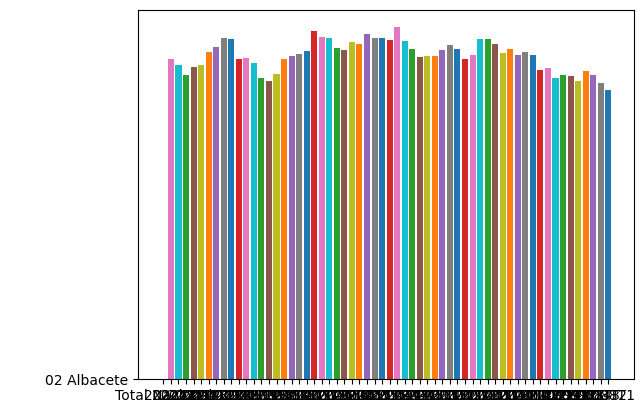

In [19]:
#Gráficos anuales por cada columna
#Gráfico de barras

for x in range(len(nframe.columns)):
    for y in range(len(nframe)):
        plt.bar(nframe.columns[x], nframe.iloc[0][x])
plt.show()

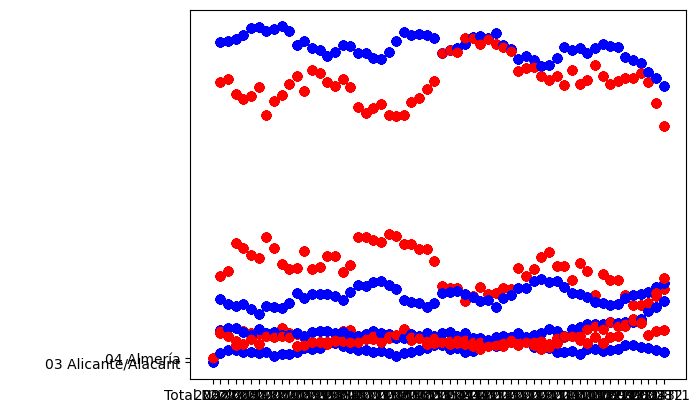

In [20]:
#Gráficos anuales por grupos de dos columnas
#Gráfico de líneas
for x in range(len(nframe.columns)):
    for y in range(len(nframe)):
        plt.plot(nframe.columns[x], nframe.iloc[1][x], "ob-")
        plt.plot(nframe.columns[x], nframe.iloc[2][x], "or-")
plt.show()

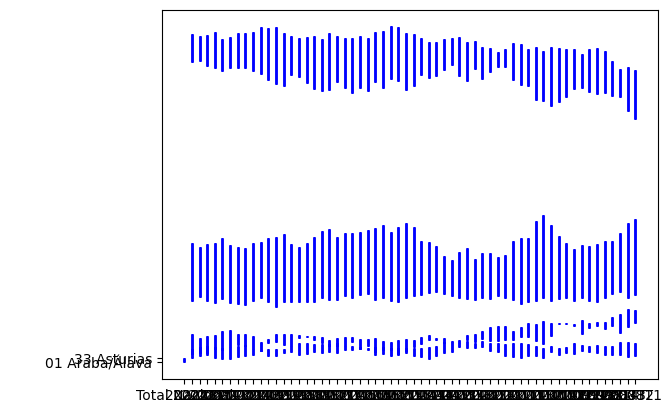

In [42]:
#Gráficos anuales por grupos de tres columnas
#Diagrama de areas
fig, ax = plt.subplots()
for x in range(len(nframe.columns)):
    for y in range(len(nframe)):
        ax.fill_between(nframe.columns[x], nframe.iloc[3][x], nframe.iloc[4][x], nframe.iloc[5][x], color="blue", alpha=0.5)
plt.show()

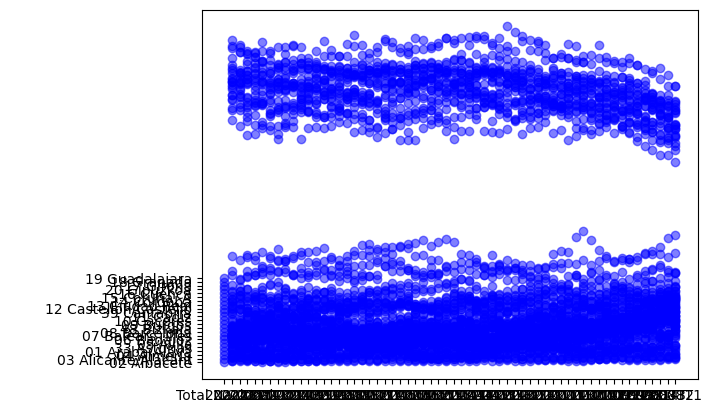

In [43]:
#Gráficos anuales por grupos de todas las columnas
#Gráfico de dispersión
fig, ax = plt.subplots()
for x in range(len(nframe.columns)):
    for y in range(len(nframe)):
        ax.scatter(nframe.columns[x], nframe.iloc[y][x], color="blue", alpha=0.5)
plt.show()




Crea una base de datos SQLite desde python

In [44]:
#Creo la base de datos SQLite
conn = sqlite3.connect('db/DataBase.db')


Guarda el dataset como una tabla en la base de datos

In [45]:
#Guardo el dataframe como una tabla en la base de datos
#controlar si hay datos duplicados
#Si hay campos duplicados, se borran
nframe.columns = nframe.columns.str.replace(' ', '_')
nframe.columns=["2022T3", "2022T2", "2022T1", "2021T4", "2021T3", "2021T2", "2021T1", "2020T4","2020T3","2020T2","2020T1",
"2019T4","2019T3","2019T2","2019T1","2018T4","2018T3","2018T2","2018T1","2017T4","2017T3","2017T2","2017T1","2016T4","2016T3","2016T2","2016T1",
"2015T4","2015T3","2015T2","2015T1","2014T4","2014T3","2014T2","2014T1","2013T4","2013T3","2013T2","2013T1","2012T4","2012T3","2012T2","2012T1",
"2011T4","2011T3","2011T2","2011T1","2010T4","2010T3","2010T2","2010T1","2009T4","2009T3","2009T2","2009T1","2008T4","2008T3","2008T2","2008T1",
"2007T4","2007T3","2007T2","2007T1","2006T4","2006T3","2006T2","2006T1","2005T4","2005T3","2005T2","2005T1","2004T4","2004T3","2004T2","2004T1",
"2003T4","2003T3","2003T2","2003T1","2002T4","2002T3","2002T2","2002T1","2001T4","2001T3","2001T2","2001T1","2000T4","2000T3","2000T2","2000T1",
"1999T4","1999T3","1999T2","1999T1","1998T4","1998T3","1998T2","1998T1","1997T4","1997T3","1997T2","1997T1","1996T4","1996T3","1996T2","1996T1",
"1995T4","1995T3","1995T2","1995T1","1994T4","1994T3","1994T2","1994T1","1993T4","1993T3","1993T2","1993T1","1992T4","1992T3","1992T2","1992T1",
"1991T4","1991T3","1991T2","1991T1","1990T4","1990T3","1990T2","1990T1","1989T4","1989T3","1989T2","1989T1","1988T4","1988T3","1988T2","1988T1",
"1987T4","1987T3","1987T2","1987T1","1986T4","1986T3","1986T2","1986T1","1985T4","1985T3","1985T2","1985T1","1984T4","1984T3","1984T2","1984T1",
"1983T4","1983T3","1983T2","1983T1","1982T4","1982T3","1982T2","1982T1","1981T4","1981T3","1981T2","1981T1","1980T4","1980T3","1980T2","1980T1",
"1979T4","1979T3","1979T2","1979T1","1978T4","1978T3","1978T2","1978T1","1977T4","1977T3","1977T2","1977T1","1976T4","1976T3","1976T2","1976T1",
"1975T4","1975T3","1975T2","1975T1","1974T4","1974T3","1974T2","1974T1","1973T4","1973T3","1973T2","1973T1","1972T4","1972T3","1972T2","1972T1",
"1971T4","1971T3","1971T2","1971T1","1970T4","1970T3","1970T2","1970T1","1969T4","1969T3","1969T2","1969T1","1968T4","1968T3","1968T2","1968T1",
"1967T4","1967T3","1967T2","1967T1","1966T4","1966T3","1966T2","1966T1","1965T4","1965T3","1965T2","1965T1","1964T4","1964T3","1964T2","1964T1",
"1963T4","1963T3"]
nframe.to_sql('datos', conn, if_exists='replace')

#Creo un cursor para poder ejecutar comandos SQL
c = conn.cursor()

#Relizo tres consultas 

#Consulta 1
cons1 = c.execute("SELECT * FROM datos WHERE '2022T3' > 9")
cons1.fetchone()

#Consulta 2
cons2 = c.execute("SELECT * FROM datos WHERE '2022T3' > 8 AND '2020T2' > 5")
cons2.fetchone()

#Consulta 3
cons3 = c.execute("SELECT * FROM datos WHERE '2022T3' > 7 AND '2020T2' > 4 AND '2019T1' > 6")
cons3.fetchone()


(8,
 '        02 Albacete',
 9.2,
 9.3,
 9.8,
 9.7,
 8.4,
 8.7,
 8.1,
 7.4,
 6.7,
 9.7,
 8.4,
 8.3,
 10.6,
 10.9,
 9.7,
 7.7,
 7.6,
 7.1,
 8.2,
 6.1,
 7.1,
 7.8,
 8.3,
 9.3,
 8.5,
 9.4,
 6.5,
 9.3,
 7.8,
 9.0,
 8.3,
 10.3,
 9.5,
 8.9,
 9.1,
 8.6,
 7.7,
 7.2,
 6.1,
 9.6,
 8.6,
 7.2,
 7.1,
 8.1,
 8.7,
 6.1,
 7.3,
 7.6,
 7.7,
 8.3,
 6.3,
 5.9,
 5.5,
 5.3,
 6.4,
 6.2,
 6.7,
 6.5,
 8.4,
 14.7,
 15.3,
 17.1,
 17.2,
 17.7,
 15.0,
 14.6,
 14.1,
 13.8,
 15.7,
 16.8,
 18.1,
 18.4,
 17.9,
 17.1,
 15.8,
 16.3,
 16.4,
 15.2,
 13.6,
 14.3,
 12.6,
 15.4,
 14.9,
 12.9,
 12.7,
 13.6,
 12.0,
 13.0,
 13.6,
 11.9,
 12.9,
 15.5,
 16.3,
 16.5,
 15.7,
 14.4,
 14.6,
 15.3,
 13.2,
 13.2,
 12.2,
 13.1,
 13.7,
 15.3,
 16.6,
 16.4,
 15.9,
 15.4,
 17.5,
 17.9,
 18.2,
 17.9,
 18.3,
 19.0,
 16.7,
 18.2,
 17.9,
 16.8,
 7.6,
 8.4,
 8.0,
 6.5,
 6.8,
 6.3,
 6.3,
 5.6,
 6.9,
 6.2,
 6.2,
 6.1,
 6.7,
 7.4,
 7.9,
 8.0,
 7.0,
 7.2,
 6.4,
 5.9,
 5.5,
 6.6,
 5.5,
 5.4,
 6.6,
 6.3,
 6.3,
 5.7,
 6.1,
 5.0,
 4.6,
 4.6,
 4.5,
 5.9

Guarda los datos de una de las consultas en un nuevo dataset

In [46]:
#Guardo el resultado de la consulta 1 en un dataframe
df = pd.DataFrame(cons1.fetchall())
df.columns = [x[0] for x in cons1.description]
df


,index,2022T3,2022T2,2022T1,2021T4,2021T3,2021T2,2021T1,2020T4,2020T3,...,1965T4,1965T3,1965T2,1965T1,1964T4,1964T3,1964T2,1964T1,1963T4,1963T3
0,9,03 Alicante/Alacant,2.3,3.0,3.0,2.5,2.5,2.3,2.4,1.5,...,73.7,74.5,74.2,73.9,71.6,70.8,70.1,68.0,66.6,64.7
1,10,04 Almería,20.2,21.5,28.0,26.7,25.1,24.5,29.4,26.8,...,69.7,67.0,65.3,65.9,66.7,66.7,67.9,65.8,60.8,55.3
2,11,01 Araba/Álava,1.1,1.4,1.8,1.1,0.8,0.9,1.3,1.6,...,61.3,63.3,63.5,62.6,62.0,62.4,61.6,61.5,58.2,56.3
3,12,33 Asturias,3.2,3.6,3.9,3.6,3.3,3.6,3.8,4.1,...,72.5,72.5,71.4,72.5,72.7,72.0,69.7,67.9,68.3,67.6
4,13,05 Ávila,9.5,9.5,10.0,10.1,9.9,12.3,10.8,11.4,...,62.6,63.1,61.2,62.1,58.6,60.5,60.7,59.4,57.7,58.8
5,14,06 Badajoz,11.2,9.9,9.7,11.9,11.4,12.5,9.6,11.0,...,67.4,68.5,67.9,65.5,65.4,66.6,65.5,64.4,63.7,66.3
6,15,"07 Balears, Illes",0.5,0.8,1.0,1.3,0.8,1.4,1.1,0.9,...,79.4,78.3,78.0,79.2,77.2,73.1,75.8,76.4,74.8,71.9
7,16,08 Barcelona,0.4,0.4,0.5,0.4,0.6,0.5,0.2,0.2,...,71.0,70.2,70.4,70.4,69.5,68.5,68.3,67.5,66.7,65.6
8,17,48 Bizkaia,0.6,1.3,1.2,1.3,0.9,1.4,1.2,0.9,...,72.9,72.8,71.6,71.2,70.5,70.1,69.7,69.5,69.4,67.2
9,18,09 Burgos,6.5,8.8,7.7,5.8,7.4,7.1,6.3,3.4,...,63.2,63.5,61.4,59.5,61.2,59.3,57.9,57.9,58.5,58.6


Guarda el nuevo dataset como una nueva tabla en la base de datos

In [47]:
#Guardo el nuevo dataframe en una nueva tabla de la base de datos
df.to_sql('consulta1', conn, if_exists='replace', index=False)

22

La realización de este hito ha sido un camino con dificultades que he sabido sobrellevar. Gracias a estas dificultades he aprendido a utilizar las herramientas que nos proporciona python para la realización de las actividades propuestas por el profesor.

He tenido dificultades a la hora de gestionar el datafranme y la base de datos en sqlite3. He tenido que investigar y buscar información para poder realizar las actividades.

Este trabajo se ha realizado con mucho esfuerzo y dedicación, por lo que espero que sea de su agrado. Gracias por su atención.


    Hito 1 - Individual - Sistema de Gestión Empresarial
    Johan Estiben Acaro Masache